# Predicting Diabetes
This notebook implements the process to build a Machine Learning model, based on the PIMI Indian Diabetes dataset, that intends to predict diabetes.
The approach is base on this github repo from Jerry Kurata:
* Kurata's repo: [bit.ly/ml_python](http://bit.ly/ml_python)
* Alternative source and columns definition: https://data.world/data-society/pima-indians-diabetes-database

#### Columns
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## 2. Load, review and clean the dataset

In [2]:
df = pd.read_csv('./data/pima-data.csv')

In [3]:
# check database shape and structure
df.shape

(768, 10)

In [4]:
# overview of the data display
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
# check if there is any null value
df.isnull().values.any()

False

In [6]:
# check if there is any NA value
df.isna().values.any()

False

In [7]:
# check correlation
def plot_correlation(df, cmap='cool', s=7):
    '''
    Receives a dataframe df and displays a matrix showing the variables correlations.
    Arguments:
         * df   = a pandas dataframe
         * cmap = the colormap to be used (default is "cool") [optional]
         * s    = the size in inches of the figure output (default is 6) [optional]
    '''
    # create correlation dataframe and plot it
    correlations = df.corr()
    fig, ax = plt.subplots(figsize=(s,s))
    ax.matshow(correlations, cmap=cmap)
    
    # add lables to x and y axis
    c = df.columns
    i = range(len(c))
    plt.xticks(i,c, rotation='vertical', fontsize=13)
    plt.yticks(i,c, fontsize=13)
    
    # add contenta annotations to each cell
    if cmap == 'cool': 
        color = 'k' 
    else: 
        color = 'w'
    
    for j in i:
        for k in i:
            text = ax.text(k, j, 
                           round(correlations.iloc[j,k], 2),
                           ha='center',
                           va='center',
                           color=color)
   
    plt.show()


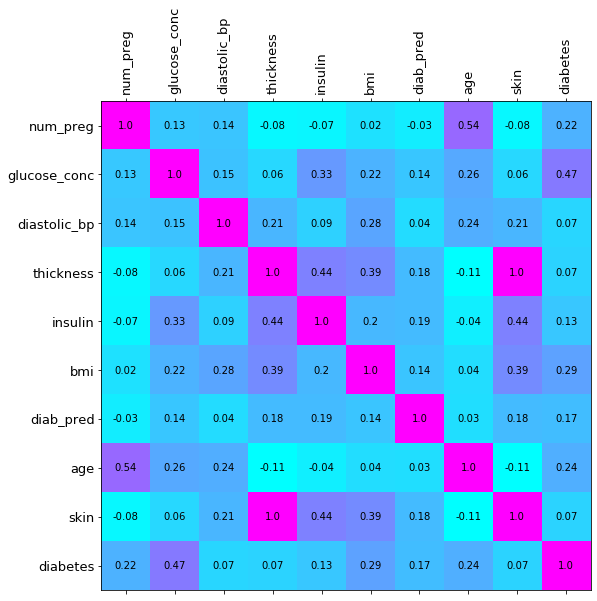

In [8]:
plot_correlation(df, s=9)

The heatmap shows us that there is a strong correlation between skin and thickness features. Let's drop the skin column and check frame again

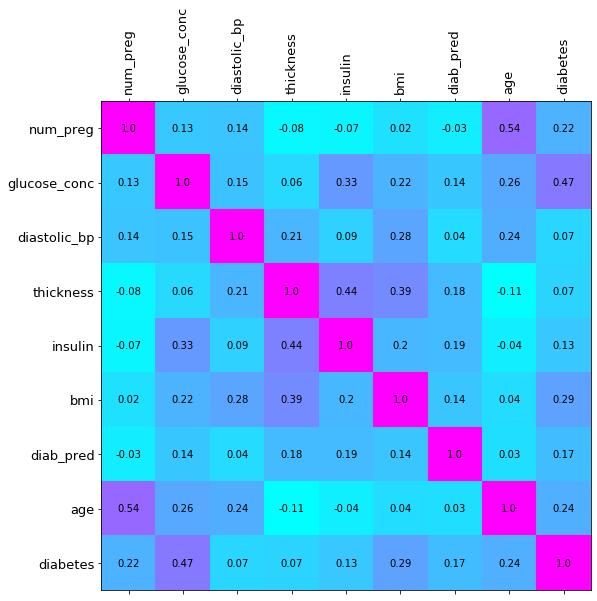

In [9]:
# delete redundant skin column
del(df['skin'])

# plot again the cleaned dataframe
plot_correlation(df, s=9)

## 3. Prepare modeling and training

In [10]:
# check dataframe data types
df.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
diabetes           bool
dtype: object

In [11]:
# turn the boolean feature into numerical
bool_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(bool_map) 

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
diabetes          int64
dtype: object

In [14]:
# check distribution of cases we want to predict
# rare events do not have enough critical mass to be predicted

cases = df['diabetes'].value_counts() / len(df['diabetes'].values)  * 100
print('False cases : \t{:.2f} %\nTrue cases : \t{:.2f} %'.format(cases[0], cases[1]))

False cases : 	65.10 %
True cases : 	34.90 %


#### Split the dataset intro training and testing

In [27]:
from sklearn.model_selection import train_test_split

x         = df.iloc[:, :-1] # features columns 
y         = df.iloc[:, -1:] # target columnd to be predicted
test_size = 0.3

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=test_size,
                                                    random_state=42)

In [35]:
# validate split size
print('training size \t = {:.2f}'.format(len(x_train)/len(df.index)))
print('testing size \t = {:.2f}'.format(len(x_test)/len(df.index)))

training size 	 = 0.70
testing size 	 = 0.30


In [47]:
aux = df.diabetes.value_counts() / len(df) * 100
print('Original diabetes ratio:\nFalse\t: {:.2f} %\nTrue\t: {:.2f} %'.format(aux[0], aux[1]))

Original diabetes ration:
False	: 65.10 %
True	: 34.90 %


In [49]:
aux = y_train.diabetes.value_counts() / len(y_train) * 100
print('Training diabetes ratio:\nFalse\t: {:.2f} %\nTrue\t: {:.2f} %'.format(aux[0], aux[1]))

Training diabetes ratio:
False	: 64.99 %
True	: 35.01 %


In [51]:
aux = y_test.diabetes.value_counts() / len(y_test) * 100
print('Test diabetes ratio:\nFalse\t: {:.2f} %\nTrue\t: {:.2f} %'.format(aux[0], aux[1]))

Test diabetes ratio:
False	: 65.37 %
True	: 34.63 %
